In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/liberals-vs-conservatives-on-reddit-13000-posts/file_name.csv


In [2]:
df = pd.read_csv('/kaggle/input/liberals-vs-conservatives-on-reddit-13000-posts/file_name.csv')

In [3]:
df

,Title,Political Lean,Score,Id,Subreddit,URL,Num of Comments,Text,Date Created
0,"No matter who someone is, how they look like, ...",Liberal,1,t5fybt,socialism,https://v.redd.it/ng5fyl7hp2l81,0,NaN,1.646272e+09
1,Biden speech draws 38.2 million U.S. TV viewers,Liberal,6,t5fqdn,democrats,https://www.reuters.com/world/us/biden-speech-...,1,NaN,1.646271e+09
2,State of the union,Liberal,1,t5fj9a,DemocraticSocialism,https://www.reddit.com/r/DemocraticSocialism/c...,1,Who watched the state of the union last night ...,1.646270e+09
3,We Should Just Give Poor People Money,Liberal,7,t5f7n9,SocialDemocracy,https://youtu.be/a80kRjpubG0,3,NaN,1.646270e+09
4,Do it for the Dew,Liberal,6,t5es2c,democrats,https://i.redd.it/drmunn90f2l81.jpg,1,NaN,1.646268e+09
...,...,...,...,...,...,...,...,...,...
12849,Ron Paul’s Spirited Defense of WikiLeaks & Fre...,Conservative,2,em7rm,anarchocapitalism,http://www.deathandtaxesmag.com/40485/ron-paul...,1,NaN,1.292421e+09
12850,"“Anarcho-capitalism, in my opinion, is a doctr...",Conservative,2,ei98o,anarchocapitalism,http://www.pressaction.com/news/weblog/full_ar...,1,NaN,1.291813e+09
12851,Mises Wiki is a wiki project dedicated to the ...,Conservative,2,e6x22,anarchocapitalism,http://wiki.mises.org/wiki/Main_Page,0,NaN,1.289910e+09
12852,Fireman Protection Monopoly - Is This Failed C...,Conservative,2,e4vtd,anarchocapitalism,http://www.csmonitor.com/Business/Mises-Econom...,0,NaN,1.289524e+09


In [4]:
df.isnull().sum()

Title                  0
Political Lean         0
Score                  0
Id                     0
Subreddit              0
URL                    0
Num of Comments        0
Text               10426
Date Created           0
dtype: int64

In [5]:
df.dtypes

Title               object
Political Lean      object
Score                int64
Id                  object
Subreddit           object
URL                 object
Num of Comments      int64
Text                object
Date Created       float64
dtype: object

In [6]:
df.Title = df.Title.astype('string')

In [7]:
df[['Political Lean']] = df[['Political Lean']].astype('string')

In [8]:
df['text'] = df['Title'].str.split(',')

In [9]:
df.text = df.text.astype('string')

In [10]:
df.dtypes

Title               string
Political Lean      string
Score                int64
Id                  object
Subreddit           object
URL                 object
Num of Comments      int64
Text                object
Date Created       float64
text                string
dtype: object

In [11]:
df.head(10)

,Title,Political Lean,Score,Id,Subreddit,URL,Num of Comments,Text,Date Created,text
0,"No matter who someone is, how they look like, ...",Liberal,1,t5fybt,socialism,https://v.redd.it/ng5fyl7hp2l81,0,NaN,1.646272e+09,"['No matter who someone is', ' how they look l..."
1,Biden speech draws 38.2 million U.S. TV viewers,Liberal,6,t5fqdn,democrats,https://www.reuters.com/world/us/biden-speech-...,1,NaN,1.646271e+09,['Biden speech draws 38.2 million U.S. TV view...
2,State of the union,Liberal,1,t5fj9a,DemocraticSocialism,https://www.reddit.com/r/DemocraticSocialism/c...,1,Who watched the state of the union last night ...,1.646270e+09,['State of the union']
3,We Should Just Give Poor People Money,Liberal,7,t5f7n9,SocialDemocracy,https://youtu.be/a80kRjpubG0,3,NaN,1.646270e+09,['We Should Just Give Poor People Money']
4,Do it for the Dew,Liberal,6,t5es2c,democrats,https://i.redd.it/drmunn90f2l81.jpg,1,NaN,1.646268e+09,['Do it for the Dew']
5,Proposed Bill Would Allow Kids With Contagious...,Liberal,3,t5eqc6,progressive,https://www.newson6.com/story/621f8983241e3107...,5,NaN,1.646268e+09,['Proposed Bill Would Allow Kids With Contagio...
6,3 House Republicans voted against a bipartisan...,Liberal,11,t5eqa1,democrats,https://www.businessinsider.com/3-house-republ...,4,NaN,1.646268e+09,"[""3 House Republicans voted against a bipartis..."
7,"If you're bombing civilian targets, you're the...",Liberal,0,t5epal,alltheleft,https://i.redd.it/hjysdukbe2l81.png,2,NaN,1.646268e+09,"[""If you're bombing civilian targets"", "" you'r..."
8,Every city have to government their resources ...,Liberal,0,t5ejvw,socialism,https://www.reddit.com/r/socialism/comments/t5...,2,NaN,1.646267e+09,['Every city have to government their resource...
9,Workers Behind First Union Push at an Amazon R...,Liberal,19,t5egv1,socialism,https://www.businessinsider.com/workers-first-...,0,NaN,1.646267e+09,['Workers Behind First Union Push at an Amazon...


In [12]:
liberal_df = df.loc[df['Political Lean'] == "Liberal"]
liberal_df.shape

(8319, 10)

In [13]:
conservative_df = df.loc[df['Political Lean'] == "Conservative"]
conservative_df.shape

(4535, 10)

#WordCloud of title for Conservative political lean

#Text preprocessing

In [14]:
text_conservative = conservative_df.text.iloc[:].values
text_c = ''
text_c = text_c.join(text_conservative)

In [15]:
text_c = text_c.lower()

In [16]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
spec_chars = string.punctuation + '\‘\’\”\“\—…'

In [18]:
text_c = "".join([ch for ch in text_c if ch not in spec_chars])

In [19]:
import re
text_c = re.sub('\n', '', text_c)

In [20]:
def remove_chars_from_text_c(text_c, chars):
    return "".join([ch for ch in text_c if ch not in chars])

In [21]:
text_c = remove_chars_from_text_c(text_c, spec_chars)

In [22]:
text_c = remove_chars_from_text_c(text_c, string.digits)

In [23]:
from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')

In [24]:
print(len(english_stopwords))

179


#Text Tokenization

In [25]:
from nltk import word_tokenize
text_c_tokens = word_tokenize(text_c)

In [26]:
import nltk
text_c = nltk.Text(text_c_tokens)

#Calculation of the frequency of occurrence of words

In [27]:
from nltk.probability import FreqDist
fdist = FreqDist(text_c)
fdist

FreqDist({'the': 1704, 'to': 1452, 'of': 1158, 'and': 796, 'in': 790, 'a': 763, 'is': 682, 'for': 583, 'on': 571, 'with': 306, ...})

In [28]:
text_c_tokens = [token.strip() for token in text_c_tokens if token not in english_stopwords]

In [29]:
text_c = nltk.Text(text_c_tokens)

In [30]:
fdist_sw = FreqDist(text_c)
fdist_sw.most_common(10)

[('trump', 257),
 ('biden', 223),
 ('ukraine', 208),
 ('us', 202),
 ('russia', 153),
 ('people', 138),
 ('capitalism', 129),
 ('would', 117),
 ('says', 112),
 ('new', 109)]

#Building a wordcloud

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
text_raw = " ".join(text_c)

In [33]:
wordcloud = WordCloud().generate(text_raw)

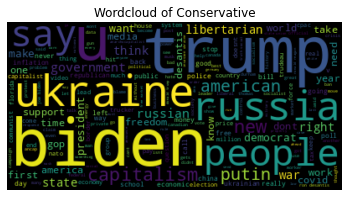

In [34]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud of Conservative')
plt.show()

#WordCloud of title for Liberal political lean

In [35]:
text_liberal = liberal_df.text.iloc[:].values
text_l = ''
text_l = text_l.join(text_liberal)

In [36]:
text_l = text_l.lower()

In [37]:
text_l = "".join([ch for ch in text_l if ch not in spec_chars])

In [38]:
import re
text_l = re.sub('\n', '', text_l)

In [39]:
def remove_chars_from_text_l(text_l, chars):
    return "".join([ch for ch in text_l if ch not in chars])

In [40]:
text_l = remove_chars_from_text_l(text_l, spec_chars)

In [41]:
text_l = remove_chars_from_text_l(text_l, string.digits)

In [42]:
text_l_tokens = word_tokenize(text_l)

In [43]:
text_l = nltk.Text(text_l_tokens)

In [44]:
fdist_l = FreqDist(text_l)
fdist_l

FreqDist({'the': 3872, 'to': 2870, 'of': 2399, 'in': 1846, 'a': 1834, 'and': 1810, 'for': 1236, 'is': 1115, 'on': 999, 'are': 576, ...})

In [45]:
text_l_tokens = [token.strip() for token in text_l_tokens if token not in english_stopwords]

In [46]:
text_l = nltk.Text(text_l_tokens)

In [47]:
fdist_l_sw = FreqDist(text_l)
fdist_l_sw.most_common(10)

[('us', 359),
 ('trump', 298),
 ('new', 262),
 ('people', 225),
 ('workers', 220),
 ('biden', 192),
 ('social', 192),
 ('democrats', 165),
 ('women', 164),
 ('says', 157)]

building a word cloud

In [48]:
text_l_raw = " ".join(text_l)

In [49]:
wordcloud_l = WordCloud().generate(text_l_raw)

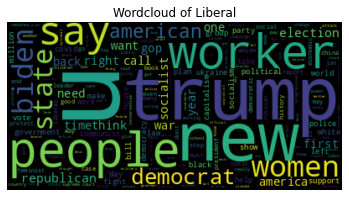

In [50]:
plt.imshow(wordcloud_l, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud of Liberal')
plt.show()